In [1]:
# settings on osc gpu
!module load cuda
!module load pytorch


The following have been reloaded with a version change:
  1) cuda/11.8.0 => cuda/10.2.89



In [2]:
#!pip3 install torch --user

In [3]:
# in osc use cuda 8.04
# https://www.osc.edu/resources/available_software/software_list/torch
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
if torch.cuda.is_available:
    print(torch.cuda.get_device_properties(0))

_CudaDeviceProperties(name='Tesla V100-PCIE-16GB', major=7, minor=0, total_memory=16144MB, multi_processor_count=80, uuid=22a52d90-379f-7608-7f7f-3939cae88dfb, L2_cache_size=6MB)


In [4]:
x_train = np.array([[3.3],[4.4],[5.5],[6.71],[6.93],[4.168],[9.779],
                    [6.182],[7.59],[2.167],[7.042],[10.791],[5.313],[7.997],
                    [3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],
                   [3.366],[2.596],[2.53],[1.221],[2.827],
                   [3.465],[1.65],[2.904],[1.3]],dtype=np.float32)
# print('sizes: x_train: {}, y_train: {}'.format(x_train.size,y_train.size))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
print('sizes: x_train: {}, y_train: {}'.format(x_train.size(),y_train.size()))

sizes: x_train: torch.Size([15, 1]), y_train: torch.Size([15, 1])


In [5]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1,1) # input and output are 1 dimensional
    def forward(self, x):
        out = self.linear(x)
        return out

In [6]:
%%time
if torch.cuda.is_available():
    model=LinearRegression().cuda()
else:
    model=LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

if torch.cuda.is_available():
    inputs = Variable(x_train).cuda()
    targets = Variable(y_train).cuda()
else:
    inputs = Variable(x_train)
    targets = Variable(y_train)

# training
num_epochs=10**3
for epoch in range(num_epochs):
#     if torch.cuda.is_available():
#         inputs = Variable(x_train).cuda()
#         targets = Variable(y_train).cuda()
#     else:
#         inputs = Variable(x_train)
#         targets = Variable(y_train)
    # forward
    out = model(inputs)
    loss = criterion(out, targets)
    # backward
    optimizer.zero_grad() # zero all grads
    loss.backward()
    optimizer.step()
    # each time the loss is different
    if (epoch+1) % (num_epochs/10) == 0:
        print('Epoch {}/{}, loss = {:.6f}'.format((epoch+1), num_epochs, loss.data))

Epoch 100/1000, loss = 0.195863
Epoch 200/1000, loss = 0.194513
Epoch 300/1000, loss = 0.193231
Epoch 400/1000, loss = 0.192014
Epoch 500/1000, loss = 0.190857
Epoch 600/1000, loss = 0.189758
Epoch 700/1000, loss = 0.188715
Epoch 800/1000, loss = 0.187723
Epoch 900/1000, loss = 0.186781
Epoch 1000/1000, loss = 0.185887
CPU times: user 1.56 s, sys: 274 ms, total: 1.83 s
Wall time: 2.34 s


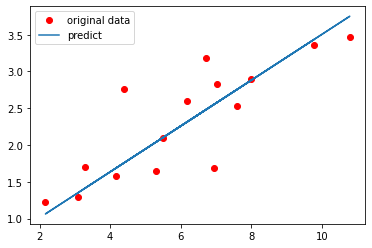

In [7]:
# print results
model.eval()
predict = model(inputs).cpu()
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(),'ro',label='original data')
plt.plot(x_train.numpy(), predict, label='predict')
plt.legend()
plt.show()